In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

RuntimeError: module compiled against API version 0xc but this version of numpy is 0xb

In [2]:
url = "https://storage.googleapis.com/applied-dl/heart.csv"
df = pd.read_csv(url)
print df.head()

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

   ca        thal  target  
0   0       fixed       0  
1   3      normal       1  
2   2  reversible       0  
3   0      normal       0  
4   0      normal       0  


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null object
target      303 non-null int64
dtypes: float64(1), int64(12), object(1)
memory usage: 33.2+ KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.594059,0.676568,3.108911,131.785479,246.547855,0.148515,0.990099,149.194719,0.326733,1.057756,1.590759,0.683168,0.273927
std,9.016370,0.468560,1.028414,17.748338,52.175933,0.356198,0.988293,23.173368,0.469794,1.165025,0.617767,0.937773,0.446710
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,152.000000,0.000000,0.800000,2.000000,0.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,165.500000,1.000000,1.600000,2.000000,1.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,1.000000


In [6]:
df.columns

Index([u'age', u'sex', u'cp', u'trestbps', u'chol', u'fbs', u'restecg',
       u'thalach', u'exang', u'oldpeak', u'slope', u'ca', u'thal', u'target'],
      dtype='object')

In [7]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

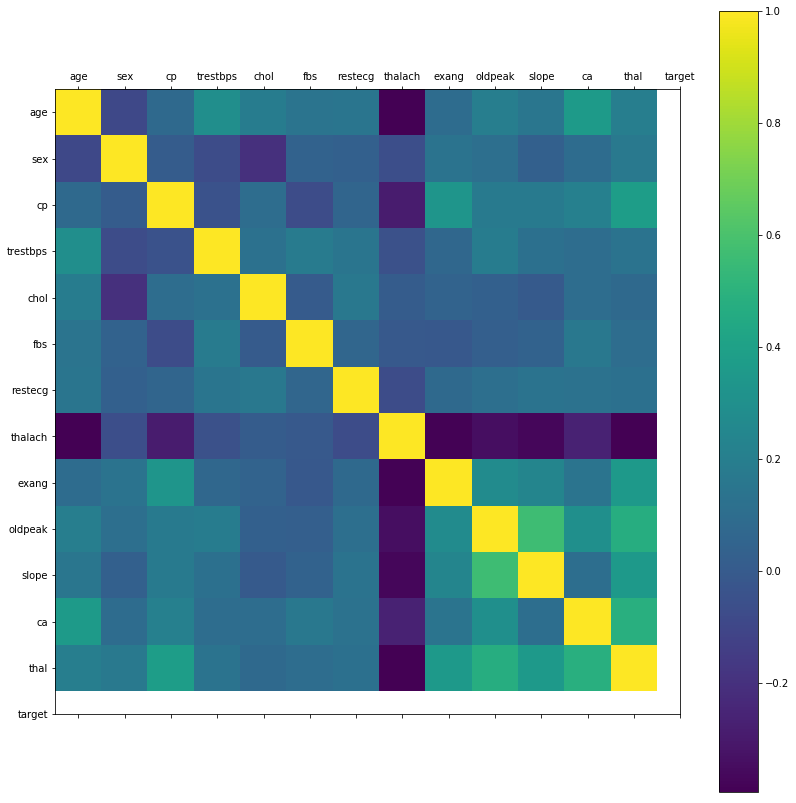

In [172]:
plt.matshow(df.corr())
plt.yticks(np.arange(df.shape[1]), df.columns)
plt.xticks(np.arange(df.shape[1]), df.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5d57f76d90>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f5d57c181d0>]], dtype=object)

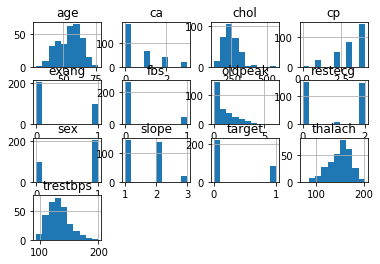

In [8]:
df.hist()

In [15]:
values = df.target.value_counts()
print values

0    220
1     83
Name: target, dtype: int64


In [10]:
from sklearn.preprocessing import StandardScaler

# Machine Learning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [11]:
new_dataset = pd.get_dummies(df, columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])
standardScaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
new_dataset[columns_to_scale] = standardScaler.fit_transform(new_dataset[columns_to_scale])

In [12]:
new_dataset.head()

,age,trestbps,chol,thalach,oldpeak,target,sex_0,sex_1,cp_0,cp_1,...,slope_3,ca_0,ca_1,ca_2,ca_3,thal_1,thal_2,thal_fixed,thal_normal,thal_reversible
0,0.933840,0.745781,-0.260087,0.034808,1.068045,0,0,1,0,1,...,1,1,0,0,0,0,0,1,0,0
1,1.378211,1.592329,0.757388,-1.780616,0.380229,1,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
2,1.378211,-0.665131,-0.336877,-0.872904,1.325977,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,-1.954574,-0.100766,0.066273,1.634109,2.099771,0,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,-1.510203,-0.100766,-0.816818,0.985744,0.294252,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [28]:
y = new_dataset['target']
X = new_dataset.drop(['target'], axis = 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [159]:

knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5,1,'K Neighbors Classifier scores for different K values')

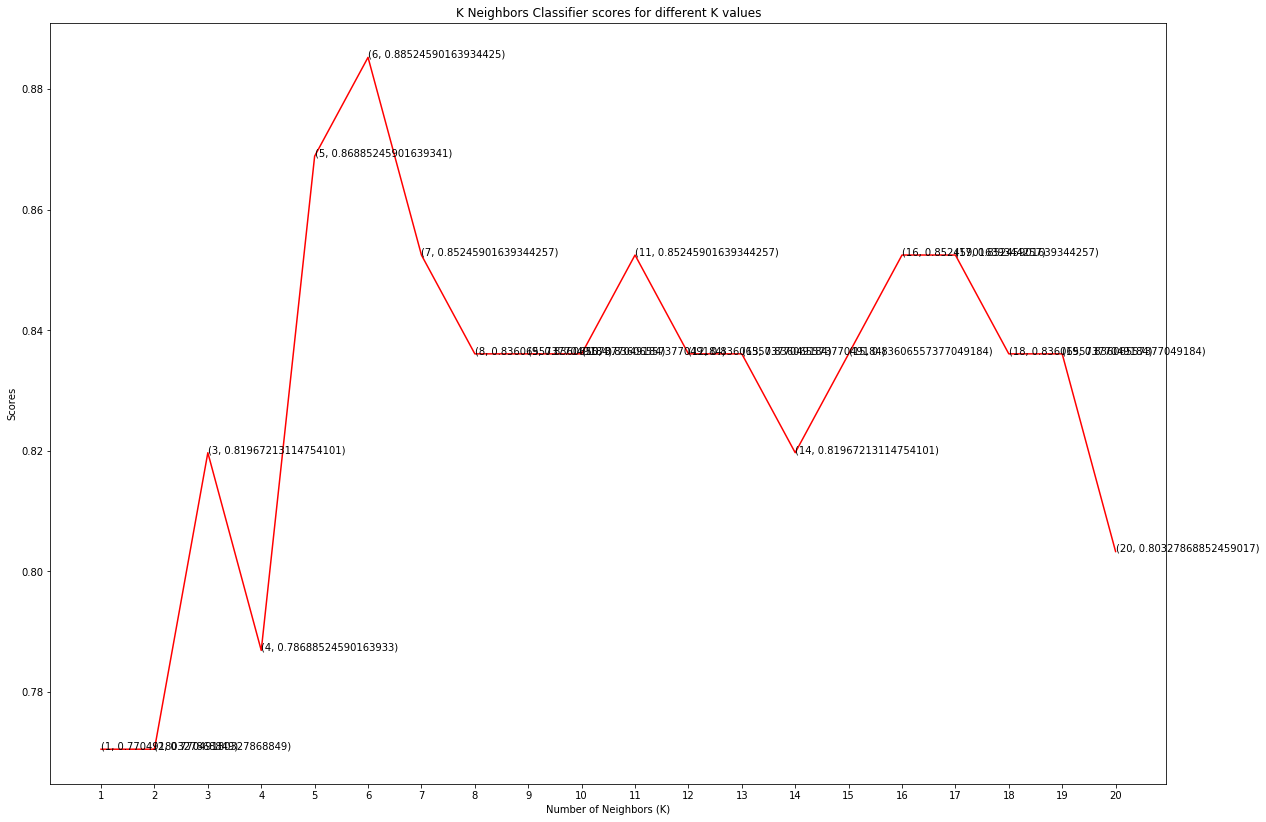

In [160]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [161]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in kernels:
    svc_classifier = SVC(kernel = i)
    svc_classifier.fit(X_train, y_train)
    y_pred = svc_classifier.predict(X_test)
    svc_scores.append(f1_score(y_pred, y_test))
    #svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5,1,'Support Vector Classifier scores for different kernels')

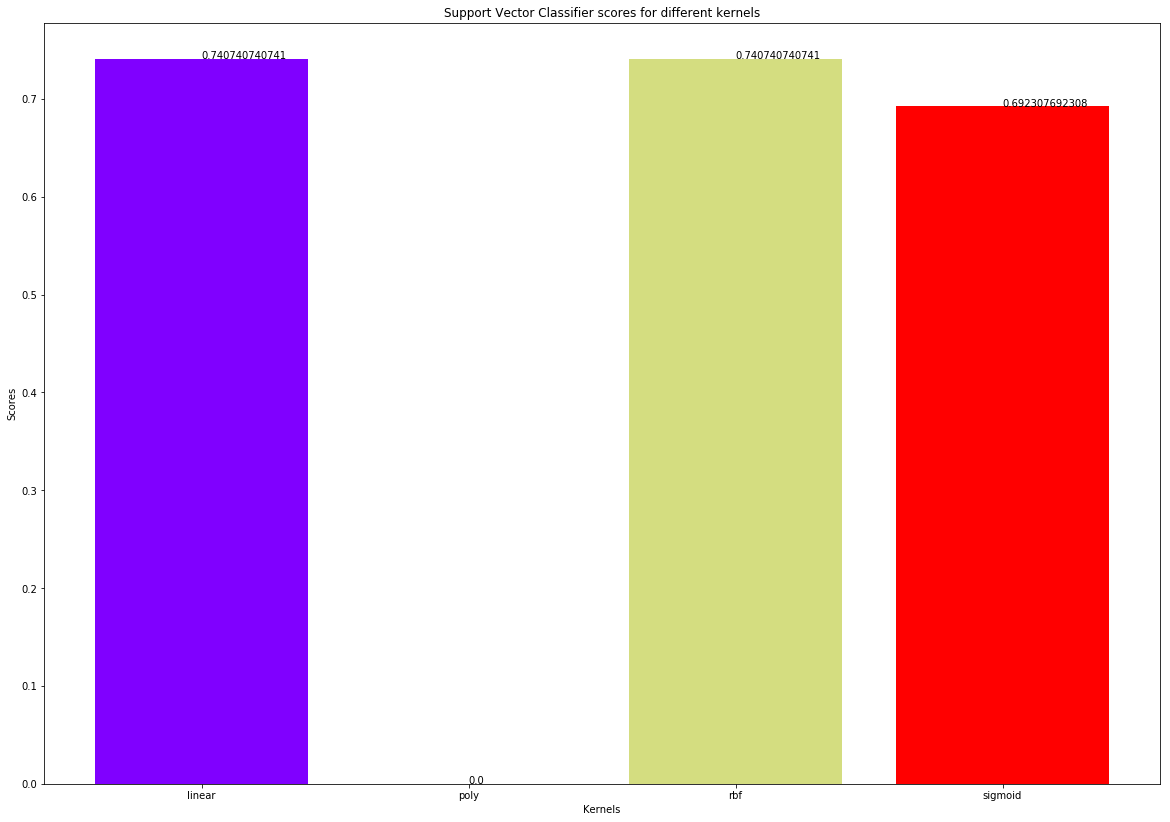

In [162]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [173]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    dt_scores.append(f1_score(y_pred, y_test))
    #print confusion_matrix(y_pred, y_test)
    #dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5,1,'Decision Tree Classifier scores for different number of maximum features')

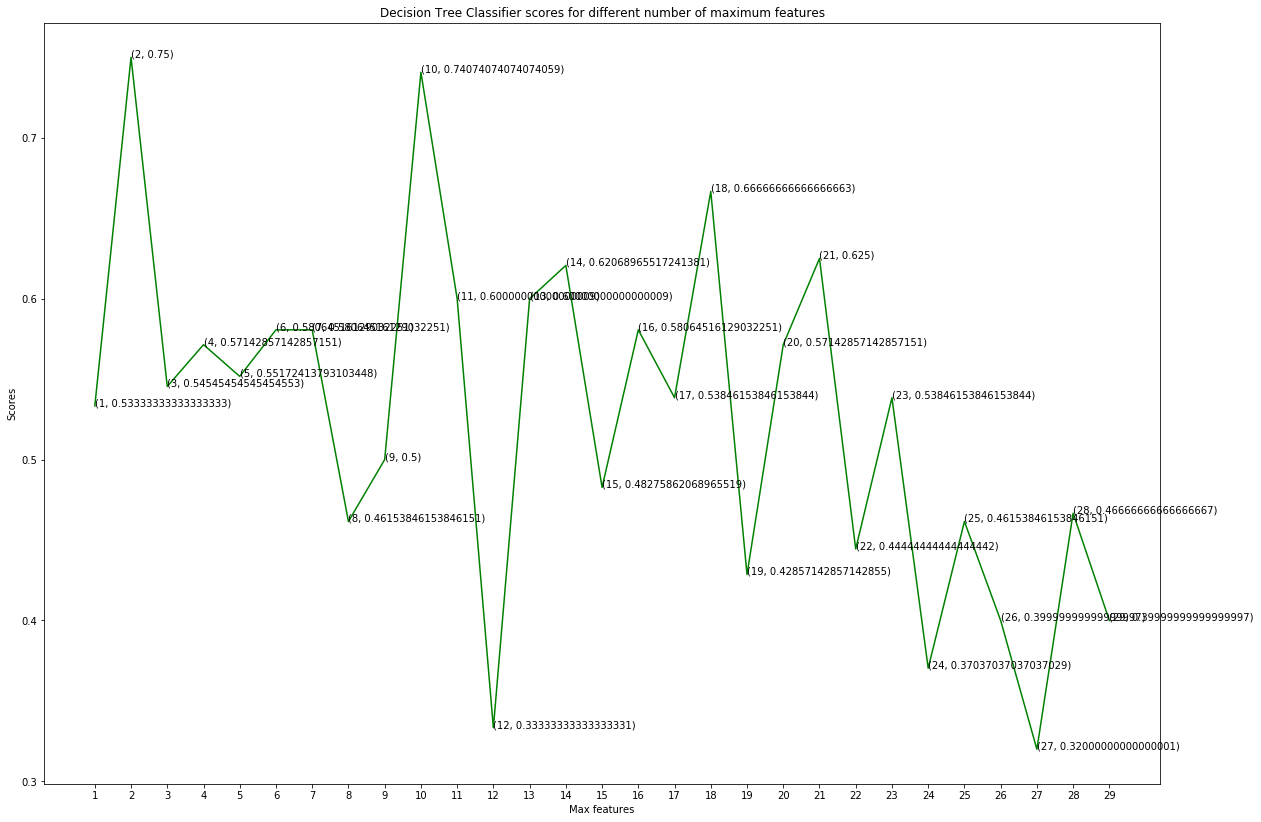

In [164]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [14]:

rf_scores = []
from sklearn import metrics
estimators = [10, 100, 200, 500, 1000]
for i in estimators:
    rf_classifier = RandomForestClassifier(n_estimators = i, random_state = 0)
    rf_classifier.fit(X_train, y_train)
    y_pred = rf_classifier.predict(X_test)
    rf_scores.append(f1_score(y_pred, y_test))
    lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
# calculate scores
lr_f1, lr_auc = f1_score(testy, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
    #print confusion_matrix(y_pred, y_test)
    #rf_scores.append(rf_classifier.score(X_test, y_test))

NameError: name 'f1_score' is not defined

Text(0.5,1,'Random Forest Classifier scores for different number of estimators')

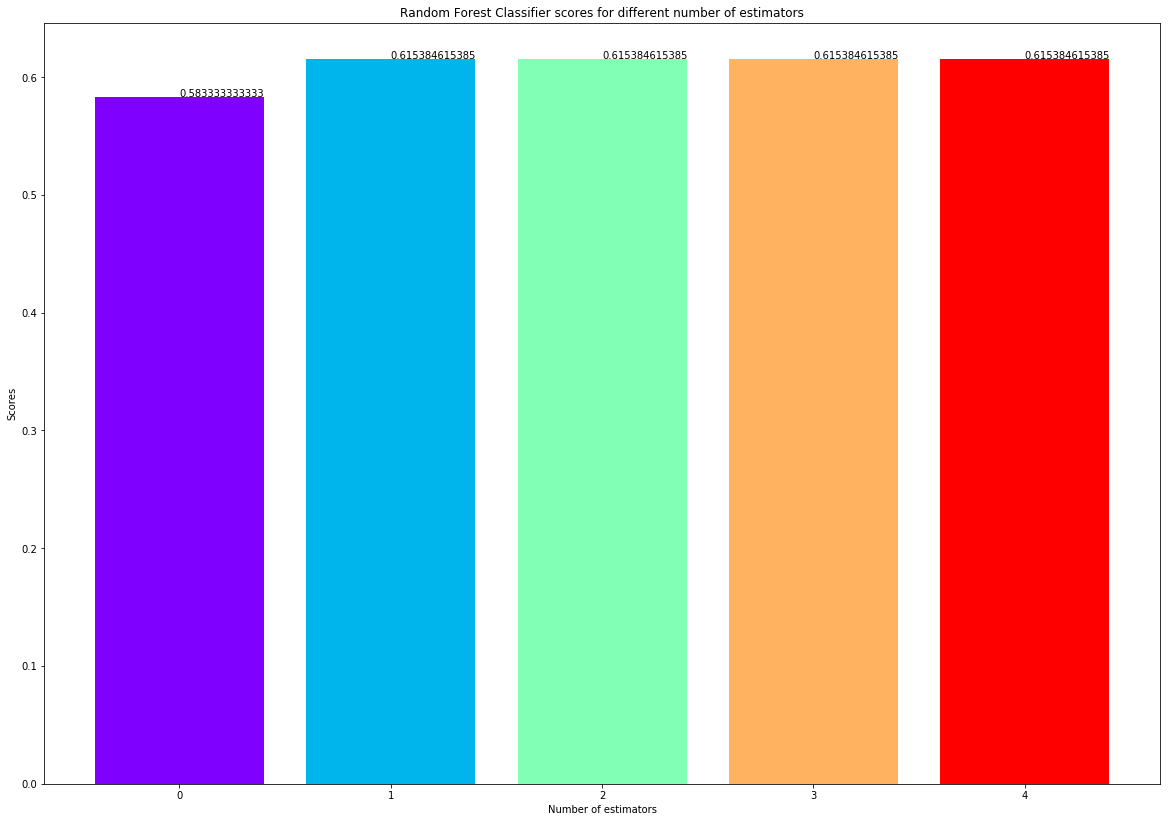

In [166]:

colors = rainbow(np.linspace(0, 1, len(estimators)))
plt.bar([i for i in range(len(estimators))], rf_scores, color = colors, width = 0.8)
for i in range(len(estimators)):
    plt.text(i, rf_scores[i], rf_scores[i])

plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.title('Random Forest Classifier scores for different number of estimators')

In [177]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

metrics.auc(fpr, tpr)

nan

In [97]:
# MODELLING
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

model = RandomForestClassifier(n_estimators = 50, max_depth = 5)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred = model.predict(X_test)

# evaluating the model
print("Training Accuracy :", model.score(X_train, y_train))
print("Testing Accuracy :", model.score(X_test, y_test))

# cofusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (5, 5)
#sns.heatmap(cm, annot = True, annot_kws = {'size':15}, cmap = 'PuBu')

# classification report
cr = classification_report(y_test, y_pred)
print(cr)
print confusion_matrix(y_test, y_pred)

ValueError: Number of labels=156 does not match number of samples=242

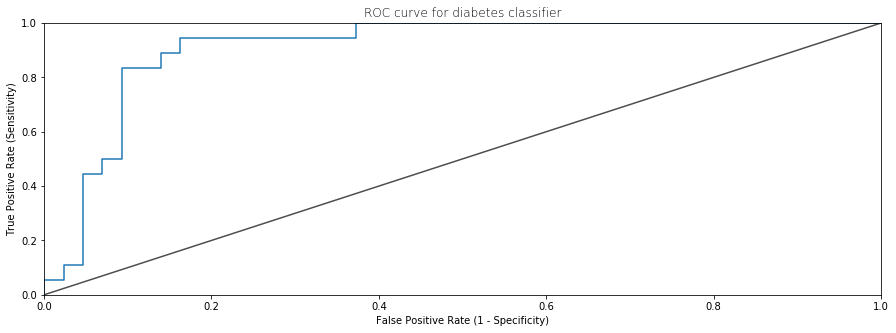

[ 0.06745796  0.54740199  0.52631185  0.13565032  0.07568205  0.51117781
  0.40654744  0.00584135  0.02654806  0.30021959  0.02457134  0.48115202
  0.60519076  0.32496055  0.04594913  0.4615182   0.02061213  0.15943925
  0.64907271  0.40525512  0.07726136  0.33447679  0.74823468  0.13304757
  0.12582838  0.50340917  0.01786119  0.09224242  0.42096539  0.00996384
  0.3917053   0.03173056  0.20162434  0.52726978  0.0161723   0.54650494
  0.00616115  0.02792981  0.20856771  0.10849283  0.02041831  0.00511767
  0.36391077  0.66640039  0.09640408  0.0033836   0.32736832  0.00436119
  0.03292623  0.21326051  0.13932713  0.62196563  0.4904602   0.01773032
  0.52603223  0.00738197  0.0298669   0.66130783  0.01212693  0.29233698
  0.14043323]


In [100]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="-", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.rcParams['figure.figsize'] = (15, 5)
plt.title('ROC curve for diabetes classifier', fontweight = 30)
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.show()
print y_pred_quant

In [21]:
# let's check the auc score

from sklearn.metrics import auc
auc = auc(fpr, tpr)
print("AUC Score :", auc)


('AUC Score :', 0.91085271317829464)


In [34]:
from  sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from statistics import mode

In [52]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict(x_test)
pred2=model2.predict(x_test)
pred3=model3.predict(x_test)

final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, (pred1[i]+pred2[i]+pred3[i])/3)

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
print confusion_matrix(y_test, final_pred)

[[41  2]
 [ 9  9]]


In [39]:
from sklearn.ensemble import VotingClassifier
model1 = LogisticRegression(random_state=1)
model2 = DecisionTreeClassifier(random_state=1)
model = VotingClassifier(estimators=[('lr', model1), ('dt', model2)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)
y_pred = model.predict(x_test)
print confusion_matrix(y_test, y_pred)

[[40  3]
 [ 9  9]]


In [63]:
model1 = DecisionTreeClassifier()
model2 = KNeighborsClassifier()
model3= LogisticRegression()

model1.fit(x_train,y_train)
model2.fit(x_train,y_train)
model3.fit(x_train,y_train)

pred1=model1.predict_proba(x_test)
pred2=model2.predict_proba(x_test)
pred3=model3.predict_proba(x_test)

finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)
print confusion_matrix(y_test, final_pred)


[[41  2]
 [ 9  9]]


In [67]:
from sklearn.model_selection import StratifiedKFold

In [94]:
x_test.dropna( axis = 0, inplace=True)

In [89]:
y_test.isnull().sum()

0

In [96]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 200 to 172
Data columns (total 31 columns):
age                156 non-null float64
trestbps           156 non-null float64
chol               156 non-null float64
thalach            156 non-null float64
oldpeak            156 non-null float64
sex_0              156 non-null uint8
sex_1              156 non-null uint8
cp_0               156 non-null uint8
cp_1               156 non-null uint8
cp_2               156 non-null uint8
cp_3               156 non-null uint8
cp_4               156 non-null uint8
fbs_0              156 non-null uint8
fbs_1              156 non-null uint8
restecg_0          156 non-null uint8
restecg_1          156 non-null uint8
restecg_2          156 non-null uint8
exang_0            156 non-null uint8
exang_1            156 non-null uint8
slope_1            156 non-null uint8
slope_2            156 non-null uint8
slope_3            156 non-null uint8
ca_0               156 non-null uint8
ca_1     

In [95]:
kf = StratifiedKFold(n_splits=10,random_state=1, shuffle = True)
for train_index,test_index in kf.split(x_train,y_train):
    print('{} of KFold {}'.format(i,kf.n_splits))
    print 
    xtr,xvl = x_train.loc[train_index],x_train.loc[test_index]
    ytr,yvl = y_train.loc[train_index],y_train.loc[test_index]
    lr = LogisticRegression()
    lr.fit(xtr,ytr)
    score = roc_auc_score(yvl,lr.predict(xvl))
    print('ROC AUC score:',score)
    cv_score.append(score)    
    pred_test = lr.predict_proba(x_test)[:,1]
    pred_test_full +=pred_test
    i+=1

60 of KFold 10



ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [69]:
def Stacking(model,train,y,test,n_fold):
    folds=StratifiedKFold(n_splits=n_fold,random_state=1)
    test_pred=np.empty((test.shape[0],1),float)
    train_pred=np.empty((0,1),float)
    for train_indices,val_indices in folds.split(train,y.values):
        x_train,x_val=train.iloc[train_indices],train.iloc[val_indices]
        y_train,y_val=y.iloc[train_indices],y.iloc[val_indices]

        model.fit(X=x_train,y=y_train)
        train_pred=np.append(train_pred,model.predict(x_val))
        test_pred=np.append(test_pred,model.predict(test))
    return [test_pred.reshape(-1,1),train_pred]

In [70]:
model1 = DecisionTreeClassifier(random_state=1)

test_pred1 ,train_pred1=Stacking(model=model1,n_fold=10, train=x_train,test=x_test,y=y_train)

train_pred1=pd.DataFrame(train_pred1)
test_pred1=pd.DataFrame(test_pred1)

In [71]:
model2 = KNeighborsClassifier()

test_pred2 ,train_pred2=Stacking(model=model2,n_fold=10,train=x_train,test=x_test,y=y_train)

train_pred2=pd.DataFrame(train_pred2)
test_pred2=pd.DataFrame(test_pred2)

In [73]:
df = pd.concat([train_pred1, train_pred2], axis=1)
df_test = pd.concat([test_pred1, test_pred2], axis=1)

model = LogisticRegression(random_state=1)
model.fit(df,y_train)
print df_test.shape
print y_test.shape
model.score(df_test, y_test)

(671, 2)
(61,)


ValueError: Found input variables with inconsistent numbers of samples: [61, 671]

In [99]:
x_test.shape

(61, 31)